Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4807s
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4834s
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4963s
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4808s
intercept =  -0.4463 m = 1.9559
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False,

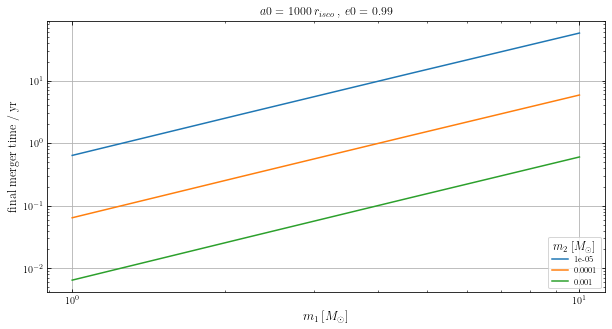

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from numpy import diff

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})



π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of yr
M_solar = 1.989e30



e0 = 0.99

r_spike = 1  # in parsecs, Choosen by choic
    
alpha = 9/4
 
D_luminosity = 5e8              # The distance to the system from earth as 500 Mpc
        
m1 = np.geomspace(1, 10, 4)  # in units of solar mass


m1_list = m1.tolist()


m2_list = [1e-5, 1e-4, 1e-3]  # in units of solar mass



    

plt.figure(figsize = (10, 5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

t_m1_list = np.zeros(len(m1_list))

for k, m_2 in enumerate (m2_list):
    for i, m_1 in enumerate (m1_list):
    
        m_bar = m_1
    
        ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))
    
        rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    
        spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
 
        m1 = m1_list[i] * ms.solar_mass_to_pc
    
        m2 = m_2 * ms.solar_mass_to_pc
    
        sp = ms.SystemProp(m1, m2, spike, D_luminosity)

        a0= 1000 * sp.r_isco()

        a_fin = sp.r_isco()      # Choosen equal to r_icso

        R_fin = sp.r_isco()      # The final condition for the evolution

        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e0,  a_fin = R_fin)
    
        t_m1_list[i] = ev_ecc.t[-1]/ms.year_to_pc
    
    
    plt.loglog(m1_list, t_m1_list, '')
    slope, intercept = np.polyfit(np.log(m1_list), np.log(t_m1_list), 1)
    print("intercept = ", '%0.4f'%intercept, "m =", '%0.4f'%slope)
   

    
    
plt.legend([ m2_list[0], m2_list[1], m2_list[2]], title = '$m_{2} \: [M_{\odot}]$',
            title_fontsize = 12, loc = 'lower right', prop = {"size":8})
plt.xlabel('$m_{1} \, [M_{\odot}]$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$ a0 = 1000 \: r_{isco} \:, \: e0 = 0.99$')
plt.savefig("m_1 vs t_m.pdf")
plt.grid()
plt.show()

Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4449s
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.3981s
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.3631s
intercept =  11.1287 m = 1.0058
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.3406s
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False,

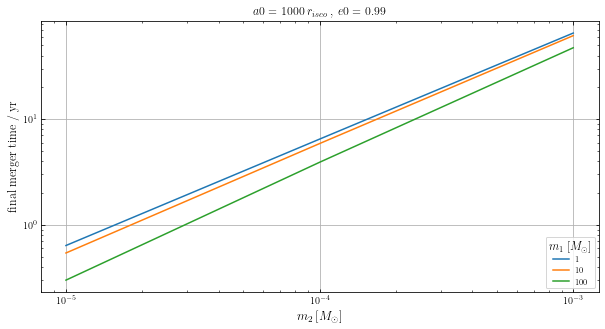

In [32]:
m2 = np.geomspace(1e-5, 1e-3, 3)  # in units of solar mass


m2_list = m2.tolist()


m1_list = [1, 10, 100]  # in units of solar mass



    

plt.figure(figsize = (10, 5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

t_m2_list = np.zeros(len(m1_list))

for k, m_1 in enumerate (m1_list):
    for i, m_2 in enumerate (m2_list):
    
        m_bar = m_1
    
        ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))
    
        rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    
        spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
 
        m1 = m1_list[i] * ms.solar_mass_to_pc
    
        m2 = m_2 * ms.solar_mass_to_pc
    
        sp = ms.SystemProp(m1, m2, spike, D_luminosity)

        a0= 1000 * sp.r_isco()

        a_fin = sp.r_isco()      # Choosen equal to r_icso

        R_fin = sp.r_isco()      # The final condition for the evolution

        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e0,  a_fin = R_fin)
    
        t_m2_list[i] = ev_ecc.t[-1]/ms.year_to_pc
    
    
    plt.loglog(m2_list, t_m2_list, '')
    slope, intercept = np.polyfit(np.log(m2_list), np.log(t_m2_list), 1)
    print("intercept = ", '%0.4f'%intercept, "m =", '%0.4f'%slope)
   

    
    
plt.legend([ m1_list[0], m1_list[1], m1_list[2]], title = '$m_{1} \: [M_{\odot}]$',
            title_fontsize = 12, loc = 'lower right', prop = {"size":8})
plt.xlabel('$m_{2} \, [M_{\odot}]$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$ a0 = 1000 \: r_{isco} \:, \: e0 = 0.99$')
plt.savefig("m_2 vs t_m.pdf")
plt.grid()
plt.show()